# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [ ]:
from sklearn.datasets import load_wine

# 데이터셋 종류 :
data = load_wine()

In [ ]:
# 데이터셋의 구조 확인
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Data shape:", data.data.shape)
print("Target shape:", data.target.shape)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']
Data shape: (178, 13)
Target shape: (178,)


In [ ]:
input = data.data
output = data.target

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)   # 같은 조건에서 항상 같은 난수 생성
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문

In [ ]:
print(x_train[0])
print(y_train[0])

#input 30개 (속성이 30개)
#y의 class는 2개 (양성과 음성)

# wine 데이터의 경우 속성 13개, class 3개

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [ ]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [ ]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까?
# hidden layer/neuron 수를 바꾸기

# wine 데이터의 경우, 178 * 13 feature이므로 최종적으로 13 * 3으로...?

model = nn.Sequential(
          nn.Linear(13,398, bias=True),
          nn.Sigmoid(),
          nn.Linear(398,15, bias=True),
          nn.Sigmoid(),
          nn.Linear(15,3, bias=True),
          nn.Softmax()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [ ]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,398, bias=True), # input_layer = 30(13으로 수정), hidden_layer1 = 398
          nn.Sigmoid(),
        nn.BatchNorm1d(398)
    )
  # activation function 이용
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨

    self.layer2 = nn.Sequential(
          nn.Linear(398,15, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(15,10, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(10,3, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

가중치 초기화. W ~ +- sqrt((6/(n_in + n_out))) (Xavier Uniform의 경우)

Lecun, Xavier, He 등의 방법이 있음.


In [ ]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-12-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=398, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=15, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [ ]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=398, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=15, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

#optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

# 세션 때 나온 옵티마이저 종류: Adagrad, RMSProp, AdaDelta, NAG, Adam 등등

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조 (스터디 이후 참고했던 부분)
# Adagrad일때 결과가 제일 좋았음!

#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adamax(model.parameters(), lr= 0.01)
#optimizer = optim.Adam(model.parameters(), lr= 0.01)
#optimizer = optim.AdamW(model.parameters(), lr= 0.01)
#optimizer = optim.NAdam(model.parameters(), lr= 0.01)

# Adagrad(adaptive gradient) adapts different learning rates for every parameter and time step:
# AdaGrad는 큰 기울기를 가져 학습이 많이 된 변수는 학습률을 감소시킵니다. 학습이 적게 된 다른 변수는 잘 학습되도록 학습률을 높게 설정하여 조절할 수 있다는 장점이 있습니다.

# Rmsprop : Adagrad의 g_t가 무한히 커지는 것을 방지, 학습률이 0으로 수렴하는 문제 해결

# Adam = Rmsprop + momentum


In [ ]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item()) # 그래프 그리기 위해 Loss값을 losses라는 리스트에 추가, item()은 텐서에서 loss 결과값의 scaler만 추출하는 함수

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.084458589553833
10 0.7436531782150269
20 0.650433361530304
30 0.6259011626243591
40 0.5985153913497925
50 0.589630126953125
60 0.5833690166473389
70 0.5750383734703064
80 0.577163815498352
90 0.5723230242729187


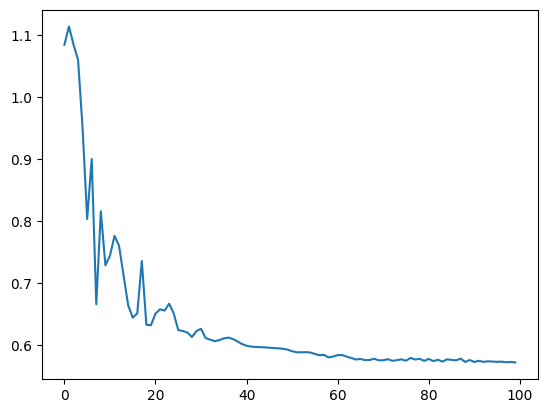

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [ ]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.9971938  0.00141522 0.00139096]
argmax를 한 후의 output은 0
accuracy는 0.9629629629629629


# < 3주차 과제 2 : CNN 맛보기>

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 118261314.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 91492215.88it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33903090.33it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8403409.25it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)의 파라미터

*   in_channels: 입력 채널 수. 흑백 이미지일 경우 1, RGB 값을 가진 이미지일 경우 3 을 가진 경우가 많음
*   out_channels: 출력 채널 수
*   kernel_size: 커널 사이즈(필터 사이즈)
*   stride: kernel을 적용하는 간격. 간격이 커질수록 출력 데이터 배열의 크기는 작아짐. 기본 값은 1
*   padding: 출력 데이터 배열의 크기를 조정하기 위해서 이미지의 주변을 채워줌. 패딩 사이즈 기본 값은 0

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5) #합성곱 레이어1 : 입력 크기는 28x28x1 -> 출력 크기는 24x24x10
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5) #합성곱 레이어2 : 입력 크기는 12x12x10 -> 출력 크기는 8x8x20
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320, 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))#맥스풀링 레이어 : 12*12로 변환
    x = F.relu(self.mp(self.conv2(x))) #맥스풀링 레이어 : 4*4로 변환, 최종적으로 [64, 20, 4, 4] 형태의 그림으로 존재함.
    x = x.view(in_size, -1) # -> batch를 제외한 남은 차원을 하나로 합침. 즉, [64, 320] 형태로 변환
    x = self.fc(x)
    return F.log_softmax(x) # 로그 소프트맥스 함수 이용??

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [ ]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

model.eval()은 PyTorch에서 모델을 평가 모드로 전환하는 메서드입니다.

model.eval()은 별도의 인수를 받지 않습니다. 단순히 model.eval()을 호출하면 모델이 평가 모드로 전환됩니다. 모델이 평가 모드로 전환되면, 드롭아웃이 비활성화되고 배치 정규화의 이동 평균과 이동 분산이 업데이트되지 않습니다.

model.eval()은 주로 테스트 데이터나 검증 데이터를 사용하여 모델을 평가할 때 사용됩니다. 평가 모드에서는 모델이 추론 시에 동일한 동작을 수행하도록 설정되어 있어, 모델의 성능 평가에 불필요한 노이즈를 줄이고 일관된 결과를 얻을 수 있습니다.

모델을 학습(training)하는 동안 사용한 모델 객체를 추론(inference)할 때 model.eval()을 호출하여 추론 모드로 전환하고, 추론이 끝난 후에는 다시 model.train()을 호출하여 학습 모드로 전환하는 것이 일반적입니다.

In [ ]:
def test():
    model.eval() #model.eval() 의 기능은? 모델을 평가모드로 전환
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-26-ce771b9addde>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.333787
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.310540
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.303401
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.287821
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.272456
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.252066
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.247658
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.187569
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.163913
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.149293
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.066093
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.952025
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.835536
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.660598
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.417570
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.141111
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.011117
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.854689
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.832860
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.572486
Train Epoch: 1 [12800/60000 (

<ipython-input-29-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1904, Accuracy: 9445/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.144356
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.311371
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.255028
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.413055
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.196605
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.076946
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.178278
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.220730
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.303001
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.197868
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.430021
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.187761
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.238727
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.208112
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.139427
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.139031
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.285748
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.137164
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.213065
Train Epoch: 2 [12